In [309]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC  
import scipy.stats as stats
from sklearn import metrics
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFE, RFECV
import warnings; warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [310]:
train_file = pd.read_csv("C:/Users/mruna/Desktop/Kaggle/Dont_overfit/train.csv")
test_file = pd.read_csv("C:/Users/mruna/Desktop/Kaggle/Dont_overfit/test.csv")
train_file.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [311]:
train_file.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


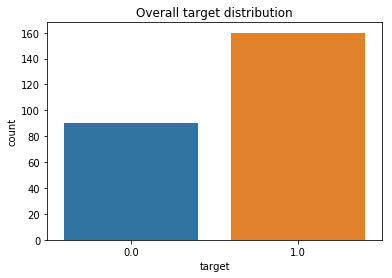

In [312]:
#train_file['target']
sns.countplot(x="target",data=train_file)
plt.title('Overall target distribution')
plt.show()

In [313]:
train_file_corr = train_file.drop(['id', 'target'], axis = 1).corr()
print(train_file_corr)
# sns.heatmap(train_file_corr, xticklabels = train_file_corr.columns, yticklabels = train_file_corr.columns)
# plt.show()

            0         1         2         3         4         5         6  \
0    1.000000 -0.003871 -0.010487 -0.047819  0.013967  0.070091 -0.022537   
1   -0.003871  1.000000  0.013573 -0.018884  0.086743 -0.028023 -0.032914   
2   -0.010487  0.013573  1.000000 -0.031620  0.088980 -0.050191  0.024674   
3   -0.047819 -0.018884 -0.031620  1.000000  0.025255  0.172058  0.157954   
4    0.013967  0.086743  0.088980  0.025255  1.000000 -0.013072 -0.030131   
5    0.070091 -0.028023 -0.050191  0.172058 -0.013072  1.000000 -0.002426   
6   -0.022537 -0.032914  0.024674  0.157954 -0.030131 -0.002426  1.000000   
7    0.002832 -0.066416  0.035260 -0.018158  0.037315  0.087932 -0.035602   
8   -0.060031 -0.027201 -0.000094  0.058736 -0.186559  0.013425 -0.043699   
9   -0.052356  0.035512  0.009949 -0.087360  0.031577  0.055556 -0.014648   
10   0.059263  0.020358  0.015158  0.095171 -0.008063  0.022024  0.139278   
11  -0.014094  0.003761 -0.029568  0.007442  0.007968 -0.010794 -0.199293   

In [314]:
#train_file_corr[train_file_corr['1'] >= 0.5 ]

In [315]:
y = train_file['target']
drops = ['id', 'target']
X = train_file
X.drop(drops, inplace=True, axis=1)
X.head()

#vif = pd.DataFrame()
#vif["features"] = train_file.columns
#vif["vif_score"] = [variance_inflation_factor(train_file.values, i) for i in range(train_file.shape[1])]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [316]:
drop_tst = ['id']
X_tst = test_file
X_tst.drop(drop_tst, inplace = True, axis=1)
X_tst.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,0.167,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,0.567,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,-0.930,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


### Recursive feature elimination - keep 200 variables

In [317]:
# recursive feature elimination

logreg = LogisticRegression()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(logreg, 200)
rfe1 = rfe.fit(X, y)
# print summaries for the selection of attributes
#print(rfe1.support_)
#print(rfe1.ranking_)

### Keep only the important variables from above in the dataframe

In [318]:
features_bool = np.array(rfe1.support_)
features = np.array(X.columns)
result = features[features_bool]
print(result)
X = X[result]

#keeping the same in the tst dataset
X_tst = X_tst[result]

['0' '1' '3' '4' '5' '8' '9' '11' '13' '14' '15' '16' '17' '18' '20' '24'
 '25' '28' '30' '33' '34' '36' '41' '42' '43' '44' '45' '46' '49' '50'
 '51' '52' '53' '56' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '78' '79' '80' '81' '82' '83' '84' '89' '90' '91' '92'
 '93' '94' '95' '96' '97' '98' '99' '100' '101' '102' '103' '105' '106'
 '107' '108' '110' '111' '112' '113' '114' '115' '116' '117' '118' '119'
 '120' '123' '125' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '137' '138' '141' '143' '145' '146' '147' '148' '149' '150' '151' '152'
 '153' '155' '156' '157' '160' '161' '164' '165' '168' '170' '171' '174'
 '176' '180' '183' '187' '188' '189' '190' '192' '193' '194' '195' '196'
 '197' '198' '199' '201' '202' '203' '206' '207' '208' '209' '211' '212'
 '214' '215' '216' '217' '218' '219' '220' '221' '224' '225' '226' '227'
 '228' '229' '230' '234' '236' '237' '239' '241' '242' '244' '245' '246'
 '247' '249' '251' '252' '257' '258' '259' '261' '262' '2

In [319]:
#result

In [320]:
print(X.shape) #(250, 200)
#X_tst.head()
print(X_tst.shape) #(19750, 300)

(250, 200)
(19750, 200)


### Split the data into training and testing

In [321]:
# 70-30 split goes as 

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic regression model

In [322]:
# instantiate the model (using the default parameters)
log_clf = LogisticRegression()
# fit the model with data
log_clf.fit(X_train,y_train)
y_pred=log_clf.predict(X_test)

In [323]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[24,  4],
       [ 7, 40]], dtype=int64)

In [324]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8533333333333334
Precision: 0.9090909090909091
Recall: 0.851063829787234


In [325]:
#y_pred
#log_clf.predict_proba(X_train)[1][0]
log_clf.predict_proba(X_train)[1][:]

array([0.9792746, 0.0207254])

### Random forest model

In [326]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [327]:
y_pred = forest_clf.predict(X_test)

In [328]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 8, 20],
       [11, 36]], dtype=int64)

In [329]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5866666666666667
Precision: 0.6428571428571429
Recall: 0.7659574468085106


### SVM model

In [330]:
svc_clf = SVC(kernel='linear', C = 1)  
svc_clf.fit(X_train, y_train)  

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [331]:
y_pred = svc_clf.predict(X_test)

In [332]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20,  8],
       [ 2, 45]], dtype=int64)

In [333]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8666666666666667
Precision: 0.8490566037735849
Recall: 0.9574468085106383


### Lasso model

In [270]:
lasso_clf = Lasso(alpha=0.03, tol=0.01, selection='random', random_state=42)
#lasso_clf.fit(X_train, y_train)

In [271]:
# splits = 10
# folds = RepeatedStratifiedKFold(n_splits=splits, n_repeats=20, random_state=42)
# oof_preds = np.zeros(X_train.shape[0])
# sub_preds = np.zeros(X_test.shape[0])

# for fold_, (trn_, val_) in enumerate(folds.split(X_train, y_train)):
#     trn_x, trn_y = X_train.iloc[trn_], y_train[trn_]
#     val_x, val_y = X_train.iloc[val_], y_train[val_]

# model = RFECV(lasso_clf, step=1, cv=(splits - 1))
# model.fit(X_train, y_train)
# oof_preds[val_] = model.predict(val_x).clip(0, 1)
# sub_preds += model.predict(X_test).clip(0, 1) / splits / 20 #folds.n_splits

In [272]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

### GRID search for random forest

In [273]:
grid_1 = { 'bootstrap': [True],
           'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
   'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]
           }
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid = grid_1, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [219]:
grid_search.best_score_

0.6571428571428571

In [220]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [221]:
rfclf1 = RandomForestClassifier(bootstrap= True, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8,
                               n_estimators= 100)
rfclf1.fit(X_train, y_train)
y_pred = rfclf1.predict(X_test)

In [222]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6266666666666667
Precision: 0.6266666666666667
Recall: 1.0


X_train.shape
X_test.shape

### GRID search wrapper - precision

In [223]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score)
}

In [224]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search


In [225]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{'max_depth': 15, 'max_features': 20, 'min_samples_split': 10, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg         1        27
pos         0        47


In [226]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
70,0.675,0.982,0.680,15,20,10,100
90,0.669,0.974,0.669,25,20,3,100
36,0.661,1.000,0.669,5,10,3,100
66,0.660,0.991,0.663,15,20,3,100
72,0.659,0.991,0.663,25,3,3,100


### GRID search wrapper - recall

In [227]:
def grid_search_wrapper(refit_score='recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search


In [228]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 3, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg         0        28
pos         0        47


In [229]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
60,0.670,1.000,0.680,15,10,3,100
94,0.666,1.000,0.674,25,20,10,100
70,0.660,0.991,0.663,15,20,10,100
90,0.660,0.974,0.657,25,20,3,100
67,0.659,0.991,0.663,15,20,3,300


### Adjust decison threshold

In [230]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)

In [231]:
p, r, thresholds = metrics.precision_recall_curve(y_test, y_scores)

In [232]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)


     pred_neg  pred_pos
neg        10        18
pos         4        43


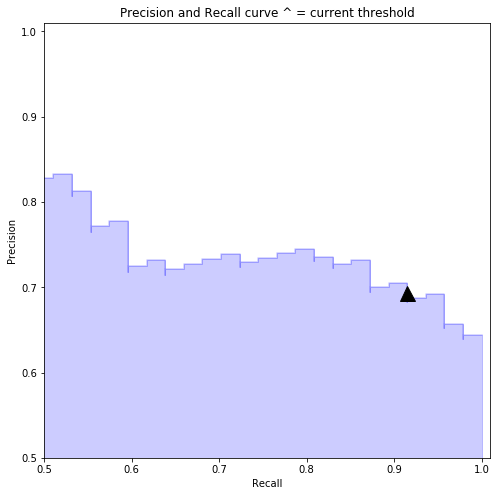

In [233]:
precision_recall_threshold(p, r, thresholds, 0.6)
plt.show()

In [234]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [235]:
fpr, tpr, auc_thresholds = metrics.roc_curve(y_test, y_scores)
print(metrics.auc(fpr, tpr)) # AUC of ROC

0.7256838905775076


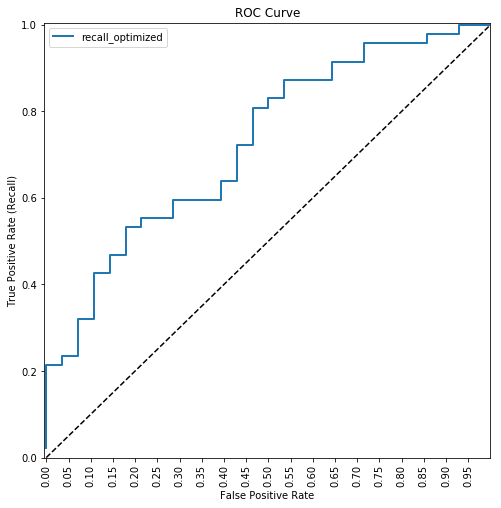

In [236]:
plot_roc_curve(fpr, tpr, 'recall_optimized')
plt.show()

### GBM model

In [334]:
tree_clf = ensemble.GradientBoostingClassifier()
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

In [335]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13, 15],
       [ 3, 44]], dtype=int64)

In [336]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.76
Precision: 0.7457627118644068
Recall: 0.9361702127659575


### Ensemble of SVM and logistic

In [337]:
estimators = []
estimators.append(('logistic', log_clf))
estimators.append(('gbm', tree_clf))
estimators.append(('randomforest', rfclf1))
estimators.append(('svm', svc_clf))
# create the ensemble model
ensemble = VotingClassifier(estimators)

### 5-fold Cross validation

In [338]:
results = cross_val_score(ensemble, X, y, cv=5)
print(results.mean())
results

0.8880000000000001


array([0.9 , 0.88, 0.86, 0.94, 0.86])

### Predict for unknown dataset using ensemble 

In [339]:
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_tst)

In [340]:
# appending the ID to predictions and extracting final submissions file

#pd.concat(columns = {'y_pred':'target'}, inplace = True)
#rsrch = pd.get_dummies(.Research, prefix = 'rsrch')

test_file = pd.read_csv("C:/Users/mruna/Desktop/Kaggle/Dont_overfit/test.csv")

Submission = test_file
Submission['target'] = y_pred
Submission = Submission[['id', 'target']]

Submission.to_csv ('C:/Users/mruna/Desktop/Kaggle/Dont_overfit/Submission.csv', index = None, header=True)

In [303]:
#test_file = pd.concat([test_file, y_pred], axis=1)

In [302]:
#test_file.head()